In [76]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [77]:
class Robot:
    
    def __init__(self,dt,Layers,Id=0):
        
        self.Id = Id
        self.dt = dt
        self.Fitness = np.inf
        
        self.r = np.array([0.,0.])
        
        theta = np.random.uniform(0.,2*np.pi)
        theta = 0. # Solo horizontal
        velo = np.random.uniform(0.9,1.1)
        self.v = np.array([velo*np.cos(theta),velo*np.sin(theta)]) 
        
        self.Steps = 0.
        
    
    def GetR(self):
        return self.r
        
    def Evolution(self):
        self.r += self.v*self.dt
        
    def Reset(self):
        self.Steps = 0.
        self.r = np.array([0.,0.])

In [78]:
Layers = [3,4]

In [79]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        r = Robot(dt,Layers,Id=i)
        Robots.append(r)
        
    return Robots

In [80]:
dt = 0.05
t = np.arange(0.,1.0,dt)

In [81]:
Robots = GetRobots(100)

In [82]:
def GetPlot():
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(-1.,1.)
    ax.set_ylim(-1.,1.)
    
    return ax

In [83]:
def TimeEvolution(Robots,e):
    
  
    for it in range(t.shape[0]):
        
        clear_output(wait=True)
        
        ax = GetPlot()
        
        ax.set_title('t = {:.3f}'.format(t[it]))
        
        for i,p in enumerate(Robots):
            p.Evolution()
            
            # Aqui va la activacion cerebral y el fitness
            
            if i < 4:
                ax.scatter(p.r[0],p.r[1],label='Id: {}'.format(p.Id))
                ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
        
        ax.legend(loc=0)      
        plt.show()
        
        time.sleep(0.01)

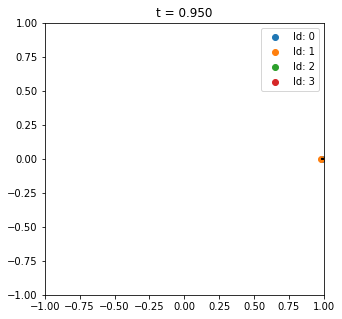

In [84]:
TimeEvolution(Robots,1)
